
# Data Science intern @LetsGrowMore
# Author : Amit jaiwal
##  INTERMEDIATE LEVEL TASK - 5TH

# <center>Stock Market Prediction using Decision Tree</center>


In [ ]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data

In [28]:
# Using data from Apple's stock.
df = pd.read_csv('stocks.csv') 

In [29]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [31]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [32]:
df.shape

(619040, 7)

# EDA

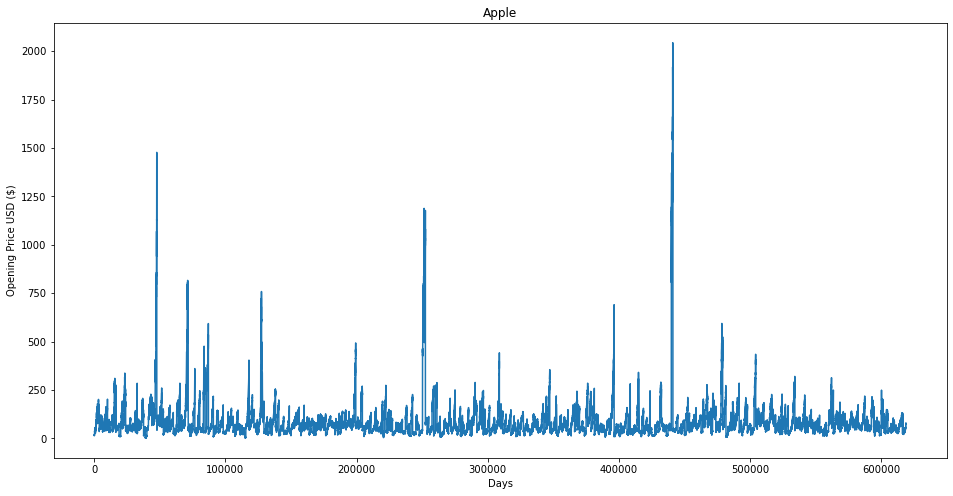

In [33]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

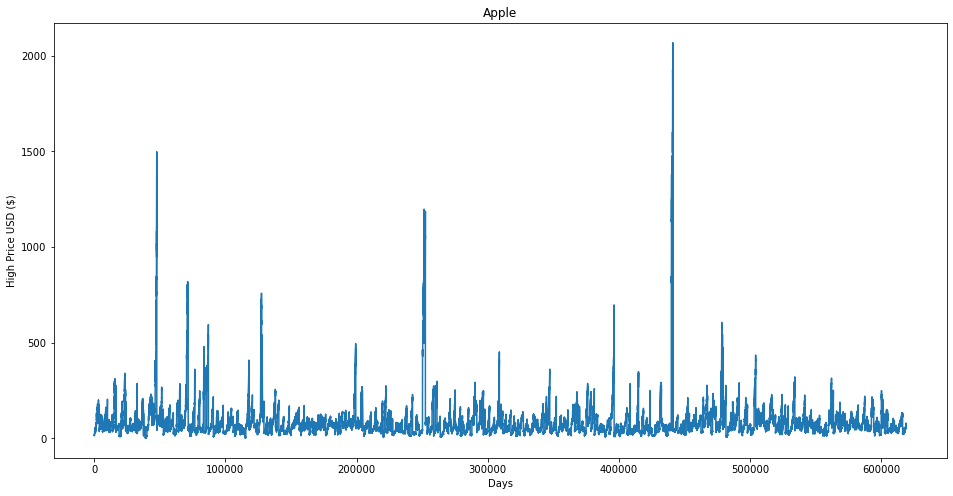

In [34]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

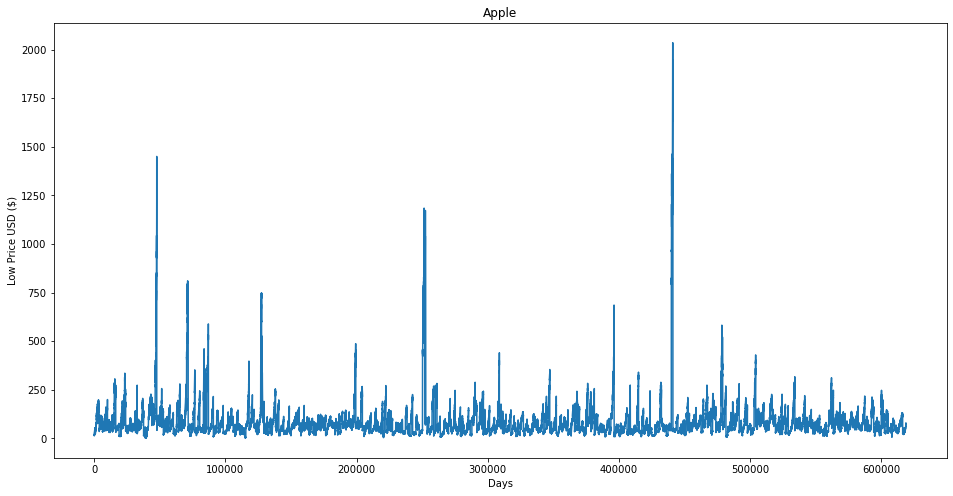

In [35]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

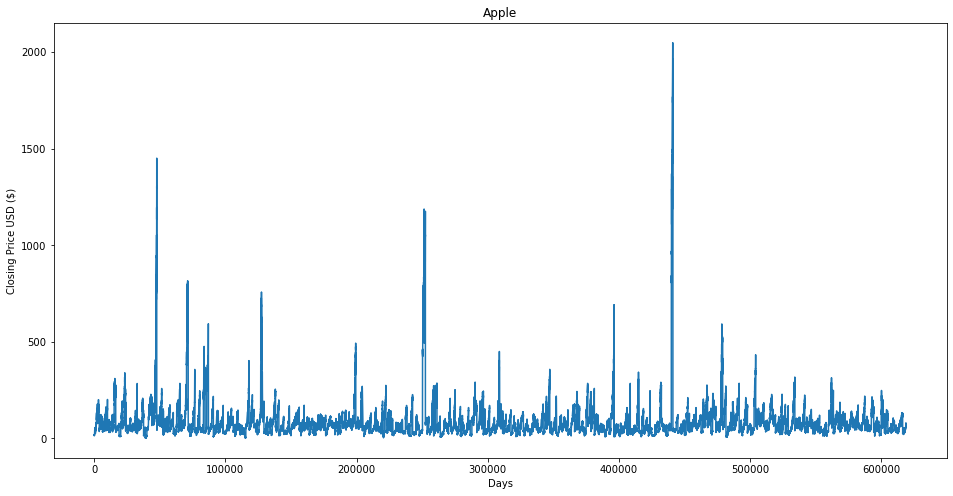

In [36]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [37]:
df2 = df['close']

In [38]:
df2.tail()

619035    77.82
619036    76.78
619037    73.83
619038    73.27
619039    73.86
Name: close, dtype: float64

In [39]:
df2 = pd.DataFrame(df2)     

In [40]:
df2.tail()

,close
619035,77.82
619036,76.78
619037,73.83
619038,73.27
619039,73.86


In [41]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [42]:
df2.tail()

,close,Prediction
619035,77.82,NaN
619036,76.78,NaN
619037,73.83,NaN
619038,73.27,NaN
619039,73.86,NaN


In [43]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[14.75]
 [14.46]
 [14.27]
 ...
 [65.4 ]
 [65.28]
 [65.25]]


In [44]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[16.75 16.84 16.94 ... 73.83 73.27 73.86]


# Linear and Decision Tree Regression

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [47]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [48]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[55.12],
       [55.57],
       [56.46],
       [56.11],
       [56.28],
       [56.47],
       [55.59],
       [58.87],
       [59.47],
       [58.81],
       [59.43],
       [59.9 ],
       [59.72],
       [59.88],
       [60.  ],
       [60.33],
       [59.73],
       [59.91],
       [60.31],
       [60.31],
       [61.43],
       [62.3 ],
       [62.58],
       [62.61],
       [62.26],
       [62.28],
       [62.64],
       [62.5 ],
       [62.67],
       [62.98],
       [63.26],
       [62.58],
       [62.59],
       [61.85],
       [61.96],
       [62.23],
       [62.39],
       [62.55],
       [63.03],
       [63.  ],
       [63.  ],
       [63.51],
       [62.78],
       [62.72],
       [62.76],
       [62.95],
       [62.5 ],
       [62.38],
       [62.67],
       [62.55],
       [61.79],
       [62.59],
       [62.47],
       [62.21],
       [62.56],
       [63.05],
       [63.35],
       [63.07],
       [62.46],
       [62.42],
       [62.75],
       [63.16],
       [

In [49]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[60.20690476 59.90948276 56.78291667 58.45891304 56.85232143 59.66712963
 58.09193182 60.13782609 64.0566     63.64118182 58.1527     62.06855769
 62.56375    63.72853448 60.26649123 64.33723404 61.4473     61.76944444
 63.1        63.1        67.64095745 68.72516949 67.1158871  64.53066667
 67.00863636 69.34342105 63.59689655 65.106625   62.96209091 66.59311111
 66.91755556 67.1158871  63.28125    66.21941176 71.32011905 62.28730769
 64.58642857 63.85229167 63.2        66.59717647 66.59717647 68.64198113
 66.22641509 69.49390909 63.44212766 62.61264706 65.106625   65.22741667
 62.96209091 63.85229167 65.73113636 63.28125    67.24297872 66.14791667
 65.17421053 66.11510204 67.12344828 68.66480769 66.50865385 66.74886792
 65.72716981 62.76151163 66.24050847 64.92281552 64.39677419 65.77173077
 66.14791667 68.65127451 67.41903846 68.37787037 69.34342105 67.41903846
 67.87777778 60.26649123 61.34304348 62.99486486 61.4473     62.5987037
 67.421      66.99482759 63.10925532 66.52438776 60.

In [50]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[58.1560012  58.5574714  59.35149024 59.03923564 59.19090216 59.3604118
 58.57531452 61.50158621 62.03687982 61.44805685 62.00119357 62.4205069
 62.25991882 62.40266378 62.5097225  62.80413398 62.26884038 62.42942846
 62.78629086 62.78629086 63.78550558 64.56168131 64.81148499 64.83824967
 64.52599507 64.54383819 64.86501435 64.74011251 64.89177903 65.16834739
 65.41815107 64.81148499 64.82040655 64.1602111  64.25834826 64.49923039
 64.64197535 64.78472031 65.21295519 65.18619051 65.18619051 65.64119007
 64.98991619 64.93638683 64.97207307 65.14158271 64.74011251 64.63305379
 64.89177903 64.78472031 64.10668174 64.82040655 64.71334783 64.48138727
 64.79364187 65.23079831 65.49844511 65.24864143 64.70442627 64.66874003
 64.96315151 65.32893547 65.44491575 63.65168218 64.34756387 64.30295606
 64.48138727 64.75795563 64.40109323 63.88364274 64.54383819 64.40109323
 64.14236798 62.5097225  63.23236886 62.27776194 62.26884038 63.16991794
 63.42864318 63.8479565  63.3126629  63.1788395  63.7

In [51]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

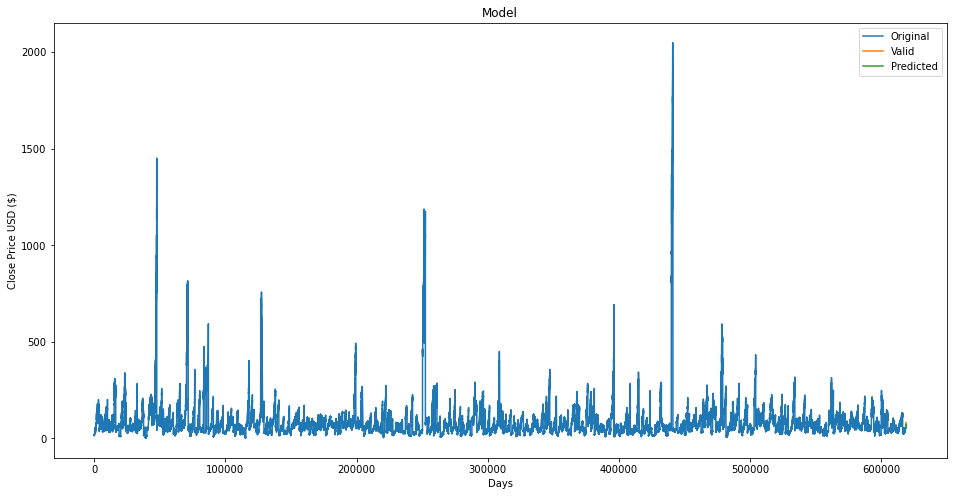

In [52]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# LGM VIP TASK-5TH SUCCESSFULLY COMPELETED